# Stochastic uncertainty propagation for multivariate functions

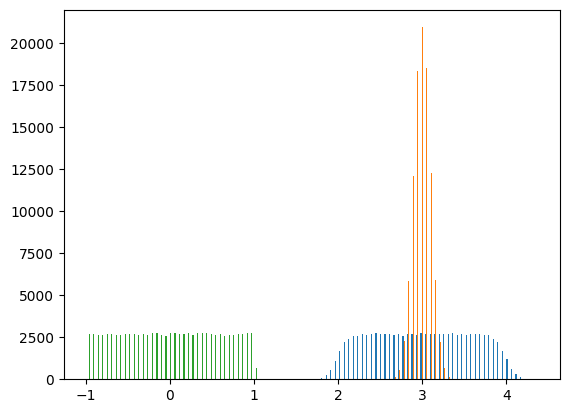

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sensitivities.stochastic import Gaussian, Uniform, sample


def my_function(a, b):
    return [a + b, a, b]


uncertainties = [
    Gaussian(3, 0.1),
    Uniform(-1, 1),
]
corr = [("a", "b", 0.0)]

samples = np.array(
    sample(
        my_function,
        uncertainties,
        corr=corr,
        n=100000,
    )
)

plt.hist(samples, 100)
plt.show()

In [2]:
f_corr = np.corrcoef(samples.T)
f_uncertainty = np.std(samples, axis=0)
print(f"linearly propagated uncertainty (1sigma):\n{f_uncertainty}")
print(f"linearly propagated correlation matrix (1sigma):\n{f_corr}")

linearly propagated uncertainty (1sigma):
[0.58571821 0.09990067 0.57726078]
linearly propagated correlation matrix (1sigma):
[[ 1.          0.16932772  0.98534715]
 [ 0.16932772  1.         -0.00125133]
 [ 0.98534715 -0.00125133  1.        ]]


compare to uncertainty propagation from linear sensitivities 

In [3]:
from sensitivities.linear import propagate_uncertainties

f_uncertainty, f_corr = propagate_uncertainties(
    my_function,
    uncertainties=[p.std() for p in uncertainties],
    x0=[p.mean() for p in uncertainties],
    corr=[[1, corr[0][2]], [corr[0][2], 1]],
)

print(f"linearly propagated uncertainty (1sigma):\n{f_uncertainty}")
print(f"linearly propagated correlation matrix (1sigma):\n{f_corr}")

linearly propagated uncertainty (1sigma):
[0.58594653 0.1        0.57735027]
linearly propagated correlation matrix (1sigma):
[[1.         0.17066404 0.98532928]
 [0.17066404 1.         0.        ]
 [0.98532928 0.         1.        ]]
